## Causal Inference

Computing the prompt engineering effect on ChatGPT Levenshtein performance

In [1]:
import pandas as pd
import textdistance


In [2]:
import json
json_path = '/workspaces/chat-gpt-failures/datasets/galeras_prompting/code_completion_docstring_3k_T2_deduped_tuned.json'
with open(json_path) as json_file:
    json_data = json.load(json_file)

In [3]:
levenshtein_similarity = textdistance.levenshtein


In [4]:
lev_calc = [levenshtein_similarity.normalized_similarity(x["code"].strip(), x["control"]["predicted"]["prediction"].strip() ) for x in json_data]


In [6]:
result=[]
for i,data in enumerate(json_data):
    dataset = {}
    dataset["y_levenshtein"] = lev_calc[i]
    dataset["t_binary_treatment"] = False
    dataset["t_treatment"] = "control"
    dataset["z_prompt_size"] = data["control"]["prompt"]["p_n_words"]
    columns={'n_ast_errors':'z_n_ast_errors','ast_levels':'z_ast_levels','n_whitespaces':'z_n_whitespaces','complexity':'z_complexity','nloc':'z_nloc','token_counts':'z_token_counts','n_ast_nodes':'z_n_ast_nodes'}
    for col in columns:
        dataset[columns[col]] = data[col]
    result.append(dataset)

In [7]:
len(result)

2923

In [8]:
lev_calc_T1 = [levenshtein_similarity.normalized_similarity(x["code"].strip(), x["T1"]["predicted"]["prediction"].strip() ) for x in json_data]


In [9]:
for i,data in enumerate(json_data):
    dataset = {}
    dataset["y_levenshtein"] = lev_calc_T1[i]
    dataset["t_binary_treatment"] = True
    dataset["t_treatment"] = "T1"
    dataset["z_prompt_size"] = data["control"]["prompt"]["p_n_words"]
    columns={'n_ast_errors':'z_n_ast_errors','ast_levels':'z_ast_levels','n_whitespaces':'z_n_whitespaces','complexity':'z_complexity','nloc':'z_nloc','token_counts':'z_token_counts','n_ast_nodes':'z_n_ast_nodes'}
    for col in columns:
        dataset[columns[col]] = data[col]
    result.append(dataset)

In [10]:
lev_calc_T2 = [levenshtein_similarity.normalized_similarity(x["code"].strip(), x["T2"]["predicted"]["prediction"] ) for x in json_data]


In [11]:
for i,data in enumerate(json_data):
    dataset = {}
    dataset["y_levenshtein"] = lev_calc_T2[i]
    dataset["t_binary_treatment"] = True
    dataset["t_treatment"] = "T2"
    dataset["z_prompt_size"] = data["control"]["prompt"]["p_n_words"]
    columns={'n_ast_errors':'z_n_ast_errors','ast_levels':'z_ast_levels','n_whitespaces':'z_n_whitespaces','complexity':'z_complexity','nloc':'z_nloc','token_counts':'z_token_counts','n_ast_nodes':'z_n_ast_nodes'}
    for col in columns:
        dataset[columns[col]] = data[col]
    result.append(dataset)

In [12]:
assert len(json_data)*3 == len(result)

In [13]:
df = pd.DataFrame(result)


In [14]:
df.head()

,y_levenshtein,t_binary_treatment,t_treatment,z_prompt_size,z_n_ast_errors,z_ast_levels,z_n_whitespaces,z_complexity,z_nloc,z_token_counts,z_n_ast_nodes
0,0.347670,False,control,16,0,9,101,1,12,48,71
1,0.554165,False,control,175,0,17,417,13,100,240,375
2,0.017834,False,control,9,0,13,208,3,17,153,253
3,0.009490,False,control,50,0,12,154,1,14,137,249
4,0.358811,False,control,38,0,13,127,3,21,82,137


# Analysis

In [15]:
df[['y_levenshtein','t_binary_treatment']].groupby('t_binary_treatment').describe()

y_levenshtein                                          \
                           count      mean       std       min       25%   
t_binary_treatment                                                         
False                     2923.0  0.403596  0.207689  0.000947  0.252389   
True                      5846.0  0.394376  0.197539  0.008000  0.246920   

                                             
                         50%       75%  max  
t_binary_treatment                           
False               0.360656  0.533667  1.0  
True                0.349234  0.511213  1.0

In [16]:
df[['z_prompt_size','t_binary_treatment']].groupby('t_binary_treatment').describe()

z_prompt_size                                               \
                           count       mean        std  min   25%   50%   75%   
t_binary_treatment                                                              
False                     2923.0  38.900103  42.694812  7.0  15.0  25.0  45.0   
True                      5846.0  38.900103  42.691160  7.0  15.0  25.0  45.0   

                           
                      max  
t_binary_treatment         
False               622.0  
True                622.0

In [17]:
#df_prune = df_total.drop(columns=['repo', 'path','file_name','fun_name','commit_message','code','random_split','tested_class','docstring','predicted_control', 'predicted_P2', 'language', 'url','signature', 'ast_errors' ])

In [18]:
#df_prune = df_prune.rename(columns={'n_ast_errors':'z_n_ast_errors','ast_levels':'z_ast_levels','n_whitespaces_':'z_n_whitespaces','complexity':'z_complexity','nloc':'z_nloc','token_counts':'z_token_counts','n_ast_nodes':'z_n_ast_nodes'})

In [20]:
df.to_json('/workspaces/chat-gpt-failures/data/causal_prompting_pd_T2_normalized.json')

In [21]:
import seaborn as sns
sns.set_theme(style="darkgrid")

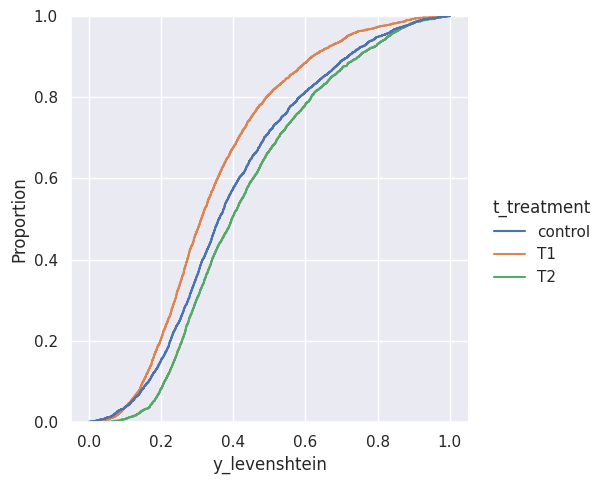

In [22]:
sns.displot(df, x="y_levenshtein", hue="t_treatment",kind="ecdf")

In [23]:
#sns.histplot(data=df_prune[["words0","words1"]], kde=True, log_scale=True).set_title("test")

In [24]:
df.head()

,y_levenshtein,t_binary_treatment,t_treatment,z_prompt_size,z_n_ast_errors,z_ast_levels,z_n_whitespaces,z_complexity,z_nloc,z_token_counts,z_n_ast_nodes
0,0.347670,False,control,16,0,9,101,1,12,48,71
1,0.554165,False,control,175,0,17,417,13,100,240,375
2,0.017834,False,control,9,0,13,208,3,17,153,253
3,0.009490,False,control,50,0,12,154,1,14,137,249
4,0.358811,False,control,38,0,13,127,3,21,82,137


<Axes: title={'center': 'y_levenshtein'}, xlabel='[t_treatment]'>

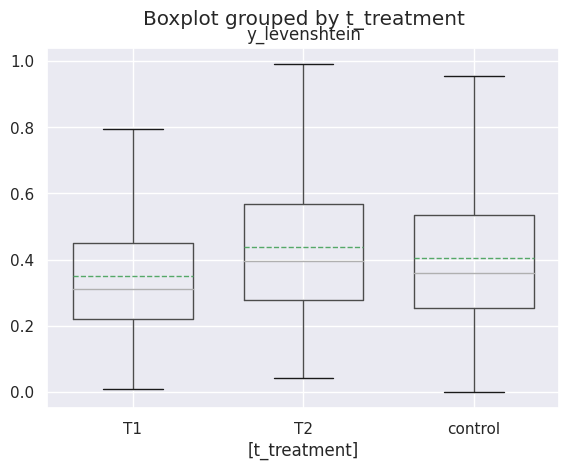

In [25]:
df[['y_levenshtein','t_treatment']].boxplot( by='t_treatment',
    bootstrap=500, 
    showfliers=False,
    showmeans=True, 
    meanline = True,
    widths = 0.7
    )

In [26]:
df[['y_levenshtein','t_treatment']].groupby('t_treatment').describe()

y_levenshtein                                                    \
                    count      mean       std       min       25%       50%   
t_treatment                                                                   
T1                 2923.0  0.351828  0.184207  0.008000  0.219246  0.311828   
T2                 2923.0  0.436923  0.201254  0.041874  0.276876  0.395802   
control            2923.0  0.403596  0.207689  0.000947  0.252389  0.360656   

                                 
                  75%       max  
t_treatment                      
T1           0.449377  1.000000  
T2           0.568913  0.989919  
control      0.533667  1.000000

In [27]:
from scipy import stats


In [31]:
confounders = {'z_prompt_size':'z_prompt_size', 'n_ast_errors':'z_n_ast_errors','ast_levels':'z_ast_levels','n_whitespaces_':'z_n_whitespaces','complexity':'z_complexity','nloc':'z_nloc','token_counts':'z_token_counts','n_ast_nodes':'z_n_ast_nodes'}

In [29]:
list(confounders.values())

['z_prompt_size',
 'z_n_ast_errors',
 'z_ast_levels',
 'z_n_whitespaces',
 'z_complexity',
 'z_nloc',
 'z_token_counts',
 'z_n_ast_nodes']

In [32]:
df["y_levenshtein"][df["t_treatment"]=="control"].values

array([0.34767025, 0.55416466, 0.01783439, ..., 0.97695853, 0.58482759,
       0.11134904])

In [33]:
treatments = ["control","T1", "T2"]

## Confounder pearson correlation: confounder -> Outcome

In [34]:

for z in list(confounders.values()):
    for treatment in treatments:
        tmp= stats.pearsonr(df["y_levenshtein"][df["t_treatment"]==treatment].values,df[z][df["t_treatment"]==treatment].values)
        print(z,treatment,tmp)
    

z_prompt_size control PearsonRResult(statistic=0.2568547879642844, pvalue=2.926716452949902e-45)
z_prompt_size T1 PearsonRResult(statistic=0.4122813875891895, pvalue=2.4274999704268832e-120)
z_prompt_size T2 PearsonRResult(statistic=0.28374367092495617, pvalue=2.9827318847464497e-55)
z_n_ast_errors control PearsonRResult(statistic=-0.024820068572200718, pvalue=0.17975033962193193)
z_n_ast_errors T1 PearsonRResult(statistic=-0.03731904286706544, pvalue=0.043644879022770186)
z_n_ast_errors T2 PearsonRResult(statistic=0.023707605843729544, pvalue=0.2000608414931278)
z_ast_levels control PearsonRResult(statistic=0.09971926415390475, pvalue=6.573178100468977e-08)
z_ast_levels T1 PearsonRResult(statistic=0.30464698830752274, pvalue=7.986359880904295e-64)
z_ast_levels T2 PearsonRResult(statistic=0.08196041678855681, pvalue=9.133061907179209e-06)
z_n_whitespaces control PearsonRResult(statistic=0.05667226054173557, pvalue=0.0021757830798315543)
z_n_whitespaces T1 PearsonRResult(statistic=0.207

<Axes: xlabel='z_prompt_size', ylabel='y_levenshtein'>

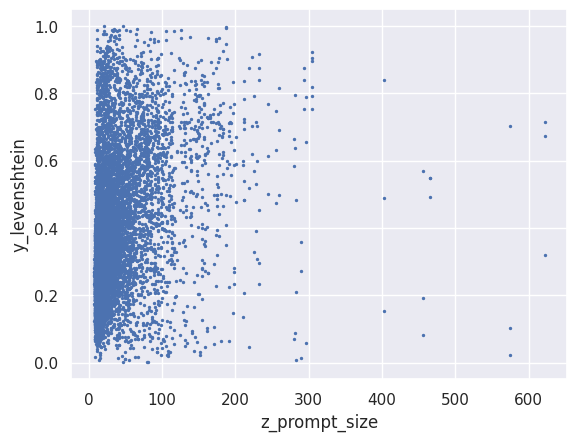

In [35]:
df.plot.scatter(x="z_prompt_size", y="y_levenshtein", s=2)

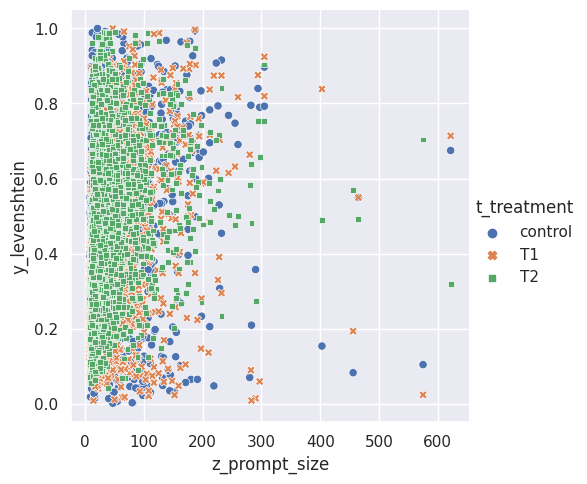

In [36]:
sns.relplot(
    data=df,
    x="z_prompt_size", y="y_levenshtein", hue="t_treatment", style="t_treatment"
)

<Axes: xlabel='t_treatment', ylabel='y_levenshtein'>

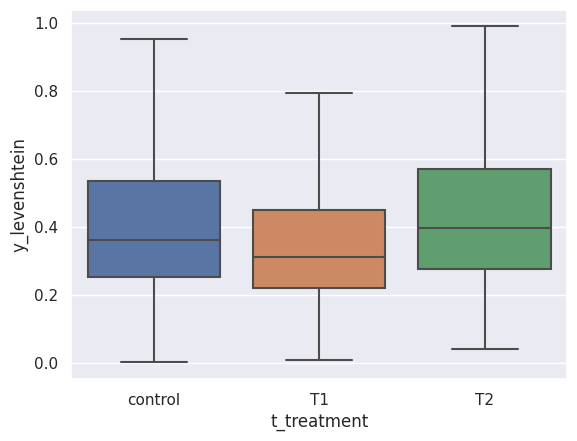

In [37]:
sns.boxplot(data=df[['y_levenshtein','t_treatment']], x="t_treatment", y="y_levenshtein",showfliers=False)


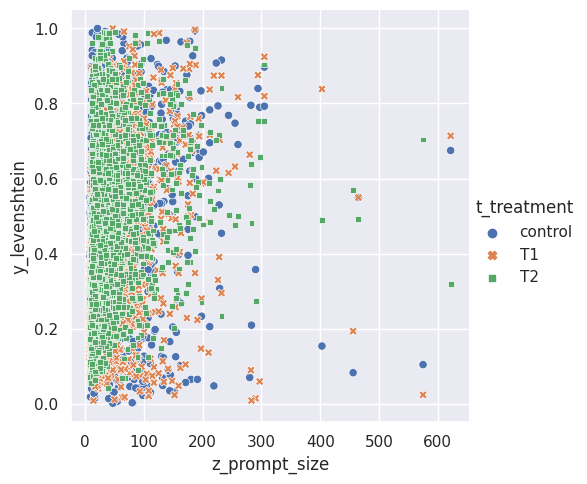

In [38]:
sns.relplot(
    data=df,
    x="z_prompt_size", y="y_levenshtein", hue="t_treatment", style="t_treatment"
)

/opt/conda/lib/python3.11/site-packages/seaborn/_stats/counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
/opt/conda/lib/python3.11/site-packages/seaborn/_stats/counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


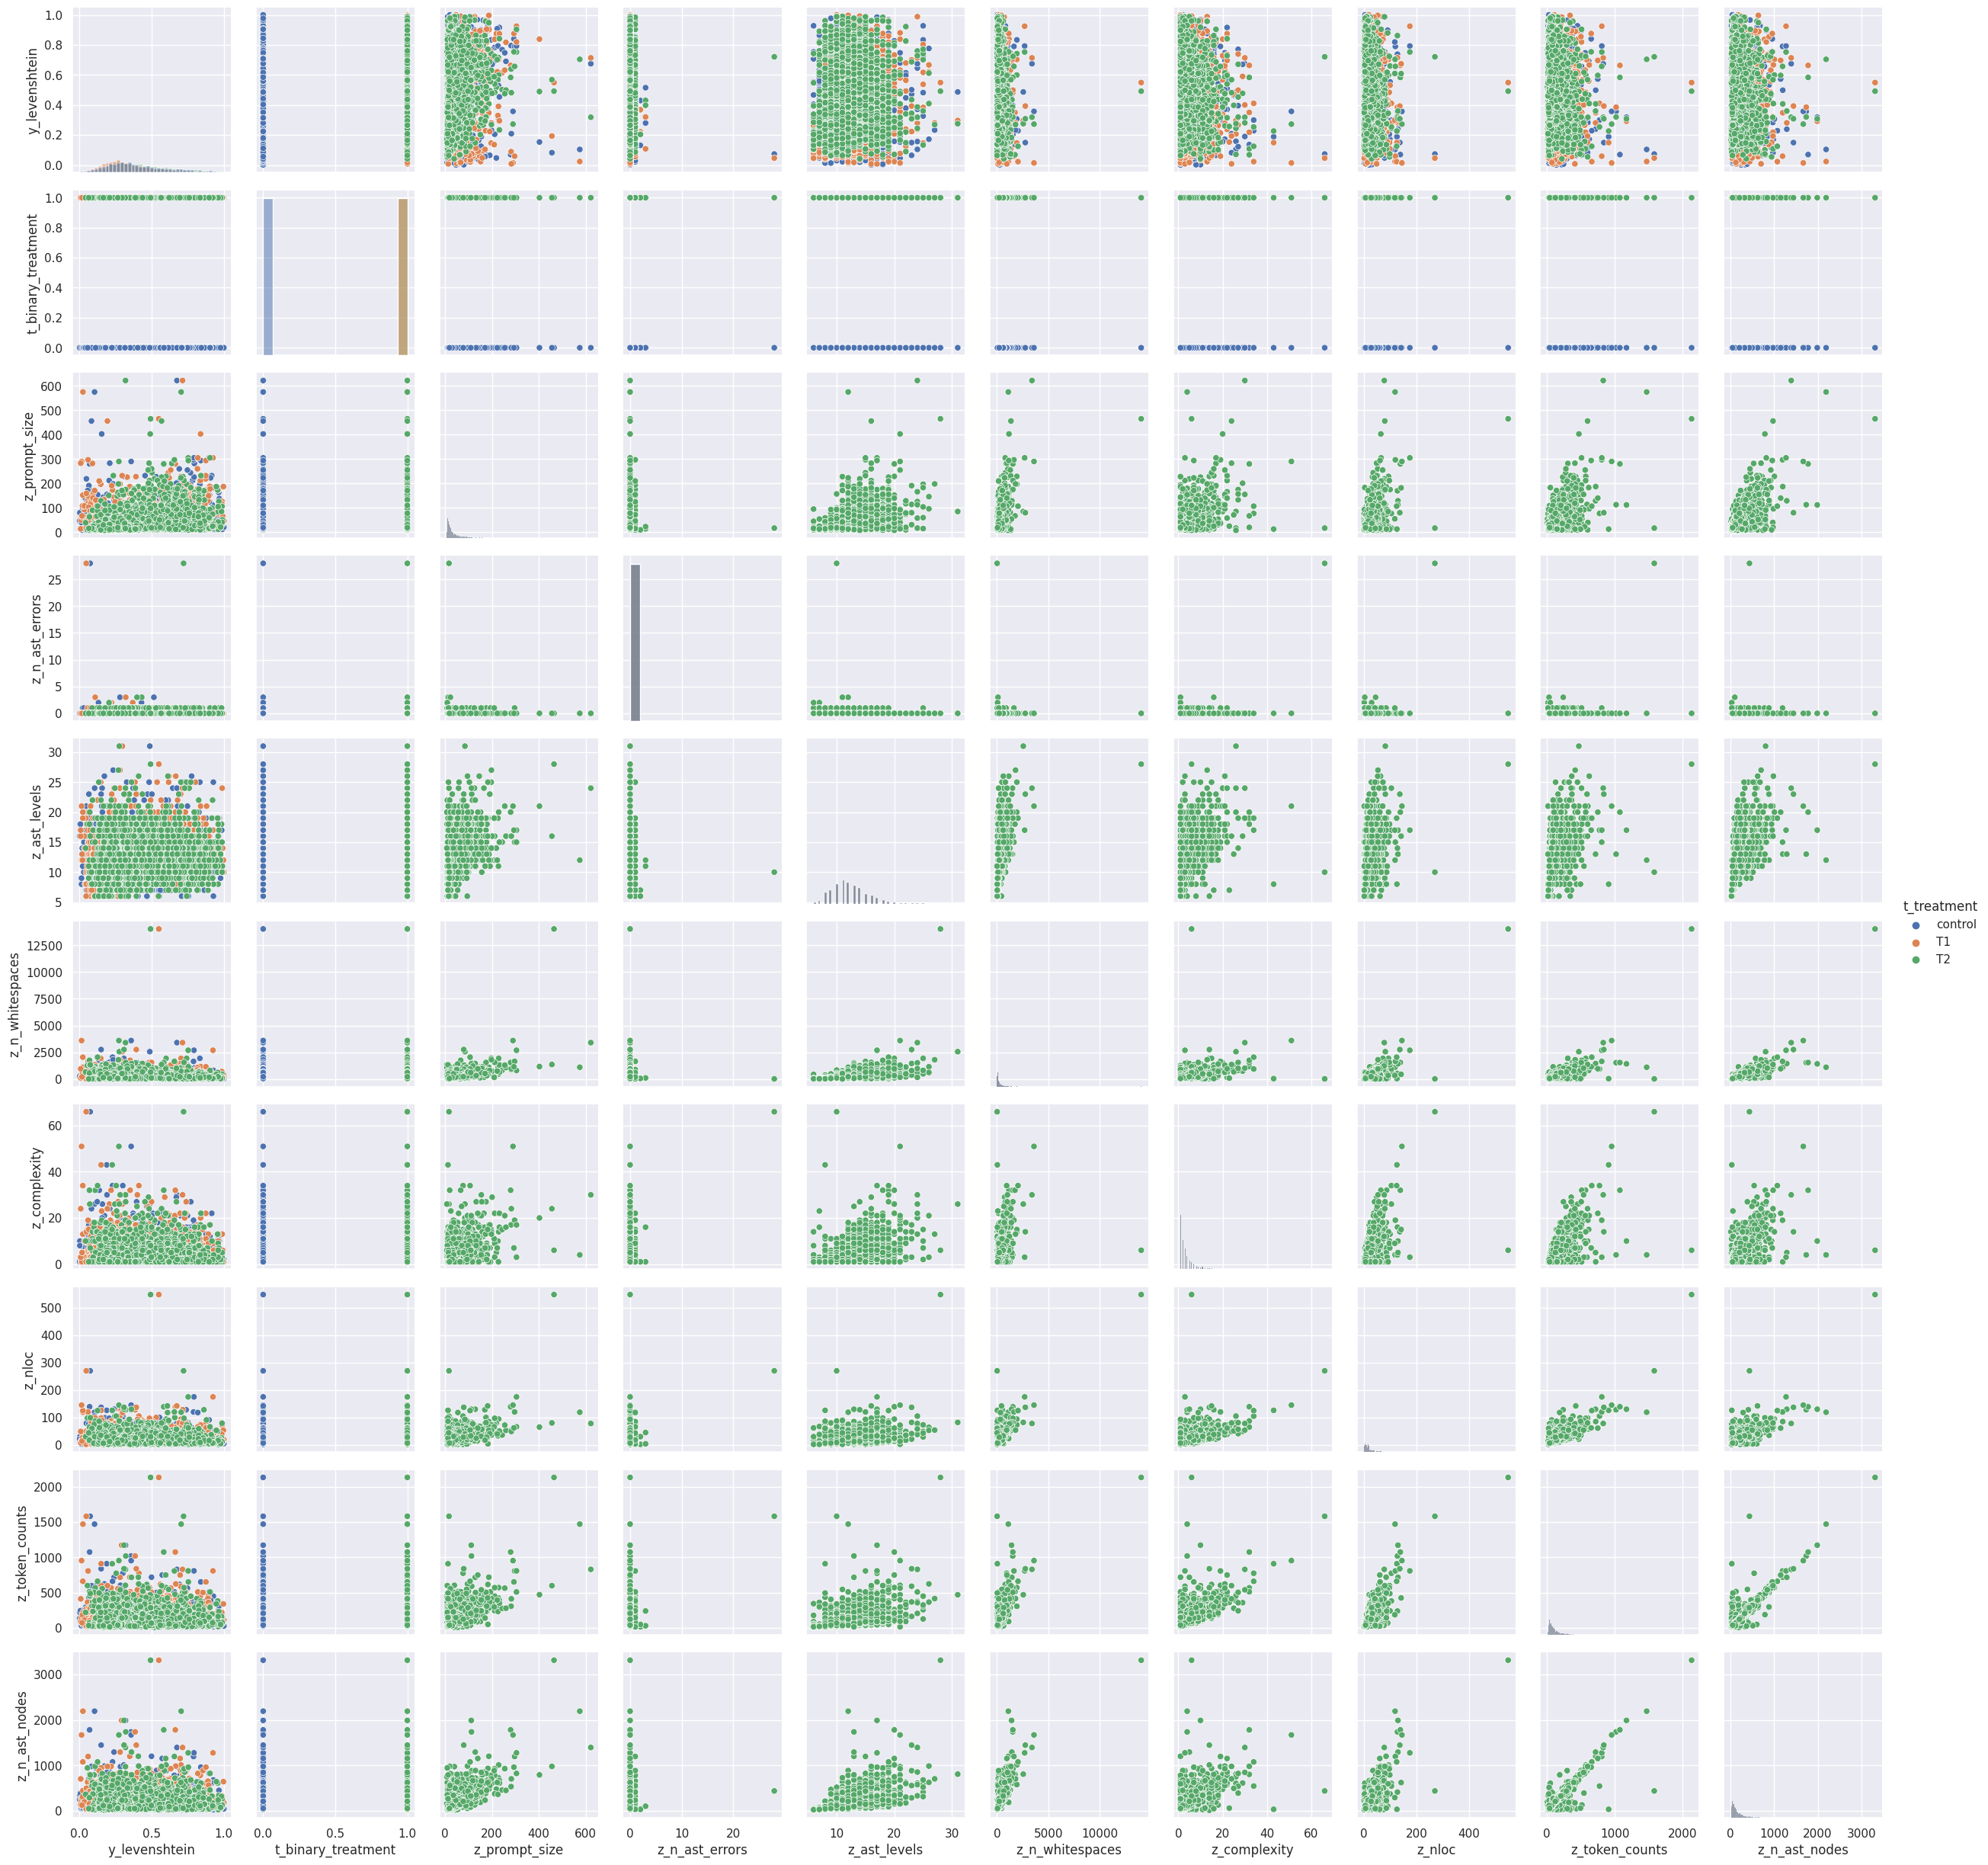

In [39]:
g = sns.PairGrid(df, hue="t_treatment")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
